,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,companyName,currency,...,zip,dcfDiff,dcf,image,ipoDate,defaultImage,isEtf,isActivelyTrading,isAdr,isFund
0,AAFTX,19.83,1.060,0.0,48947033574,0.302,15.82-20.1,-0.13,American Funds 2035 Target Date Retirement Fund,USD,...,None,NaN,0.000000,https://images.financialmodelingprep.com/symbo...,2007-02-02,True,False,True,False,True
1,AAGTX,21.21,1.160,0.0,45177581563,0.271,16.44-21.54,-0.15,American Funds 2040 Target Date Retirement Fun...,USD,...,None,NaN,0.000000,https://images.financialmodelingprep.com/symbo...,2007-02-02,True,False,True,False,True
2,AALTX,21.50,1.210,0.0,34178019316,0.238,16.45-21.87,-0.17,American Funds 2050 Trgt Date Retire A,USD,...,None,NaN,0.000000,https://images.financialmodelingprep.com/symbo...,2007-02-02,True,False,True,False,True
3,AAPL,230.76,1.239,50981675.0,3508498116000,1.000,164.08-237.49,-5.10,Apple Inc.,USD,...,95014,80.89419,148.925813,https://images.financialmodelingprep.com/symbo...,1980-12-12,False,False,True,False,False
4,ABALX,36.26,0.940,0.0,236312412110,0.675,28.83-36.68,-0.21,American Funds American Balanced Fund Class A,USD,...,None,-45.26165,78.261652,https://images.financialmodelingprep.com/symbo...,1986-01-02,True,False,True,False,True


,symbol,cik,date,environmentalScore,socialScore,governanceScore,ESGScore,companyName,industry,formType,acceptedDate,url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAPL,0000320193,2024-06-29,52.37,44.7,60.48,52.52,Apple Inc.,Electronic Computers,8-K,2024-08-01 16:30:26,https://www.sec.gov/Archives/edgar/data/320193...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,title,name,pay,currencyPay,gender,yearBorn,titleSince,symbol
0,Senior Vice President of Worldwide Marketing,Mr. Greg Joswiak,NaN,USD,male,NaN,None,AAPL
1,Senior Director of Corporate Accounting,Mr. Chris Kondo,NaN,USD,male,NaN,None,AAPL
2,"Senior Vice President, General Counsel & Secre...",Ms. Katherine L. Adams,4618064.0,USD,female,1964.0,None,AAPL
3,Head of Corporate Development,Mr. Adrian Perica,NaN,USD,male,1974.0,None,AAPL
4,Director of Investor Relations,Suhasini Chandramouli,NaN,USD,,NaN,None,AAPL


c:\Users\ericb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


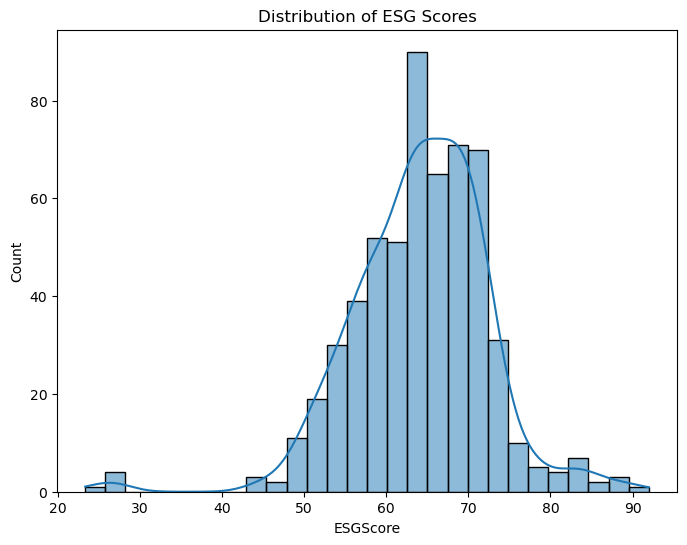

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = '../data'

# 1. Collect all JSON files
json_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.json')]

profiles = []
esg_scores = []
executives_list = []

for file_name in json_files:
    with open(os.path.join(DATA_DIR, file_name), 'r') as f:
        data = json.load(f)

        # Extract the 'profile' section
        profile_data = data.get('profile', {})
        profiles.append(profile_data)
        
        # Extract the 'esg' section
        esg_data = data.get('esg', {})
        esg_scores.append(esg_data)
        
        # Extract the 'executives' section
        execs = data.get('executives', [])
        # Add a reference to the symbol so we know which company they're from
        for e in execs:
            e['symbol'] = profile_data.get('symbol')
        executives_list.extend(execs)

# Create DataFrames
df_profiles = pd.DataFrame(profiles)
df_esg = pd.DataFrame(esg_scores)
df_executives = pd.DataFrame(executives_list)

# Let's see what these dataframes look like
display(df_profiles.head())
display(df_esg.head())
display(df_executives.head())

# Basic cleaning
df_profiles['companyName'] = df_profiles['companyName'].fillna('Unknown')
df_esg['ESGScore'] = pd.to_numeric(df_esg['ESGScore'], errors='coerce')

# Quick EDA Plot
plt.figure(figsize=(8,6))
sns.histplot(df_esg['ESGScore'], kde=True)
plt.title('Distribution of ESG Scores')
plt.show()
